In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import random
from datetime import datetime

random.seed(42)
np.random.seed(42)

In [33]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [35]:
data.dropna(inplace = True)

In [36]:
# Переименую названия значений в ocean_proximity во избежание ошибок
data['ocean_proximity'] = data['ocean_proximity'].replace({
    '<1H OCEAN': 'H_OCEAN',
    'NEAR BAY': 'NEAR_BAY',
    'NEAR OCEAN': 'NEAR_OCEAN'
})

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [38]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [39]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR_BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR_BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR_BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR_BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR_BAY


In [40]:
data.duplicated().sum()

np.int64(0)

### Разделение данных

In [41]:
X = data.drop('median_house_value', axis = 1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = data['ocean_proximity'])

print(X_train.shape)
print(X_test.shape)

(16346, 9)
(4087, 9)


### Анализ данных

Посмотрим распределение целевой переменной

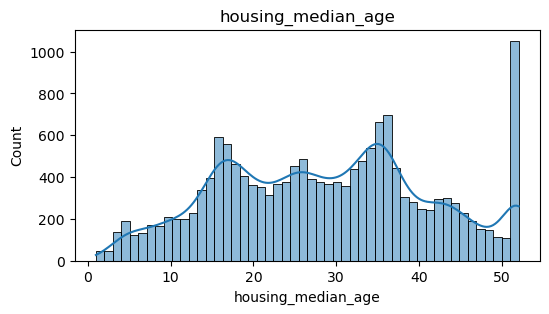

In [42]:
plt.figure(figsize = (6, 3))
sns.histplot(X_train['housing_median_age'], bins = 50, kde=True)

plt.title('housing_median_age')
plt.show()

Наблюдаем бимодальное распределение: пики в интервалах 15-18 и 34-37

Построим графики зависимости цены от ключевых факторов

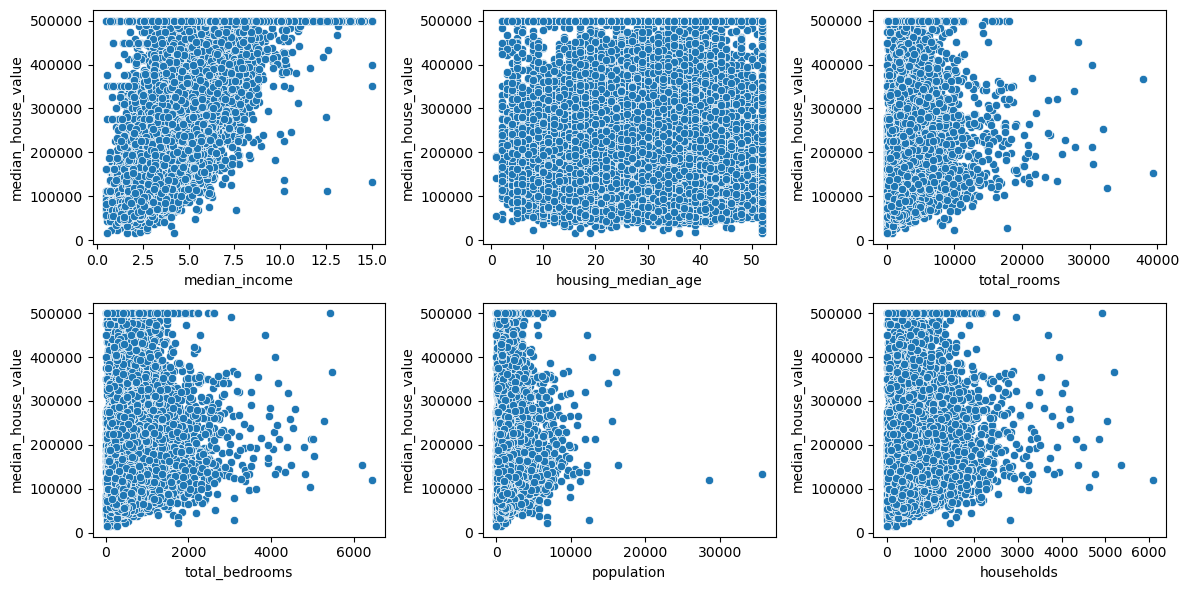

In [43]:
fig, axes = plt.subplots(2, 3, figsize = (12, 6))
sns.scatterplot(data=data, x='median_income', y='median_house_value', ax=axes[0,0])
sns.scatterplot(data=data, x='housing_median_age', y='median_house_value', ax=axes[0,1])
sns.scatterplot(data=data, x='total_rooms', y='median_house_value', ax=axes[0,2])
sns.scatterplot(data=data, x='total_bedrooms', y='median_house_value', ax=axes[1,0])
sns.scatterplot(data=data, x='population', y='median_house_value', ax=axes[1,1])
sns.scatterplot(data=data, x='households', y='median_house_value', ax=axes[1,2])
plt.tight_layout()

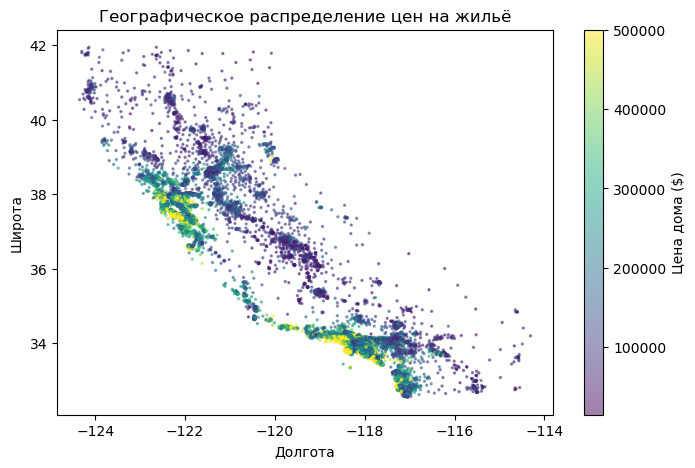

In [44]:
# Карта Калифорнии с градацией цены
plt.figure(figsize=(8, 5))
scatter = plt.scatter(data['longitude'], data['latitude'], 
                     c=data['median_house_value'], cmap='viridis', 
                     alpha=0.5, s=2)
plt.colorbar(scatter, label='Цена дома ($)')
plt.title('Географическое распределение цен на жильё')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

Видим, что наиболее дорогие дома находятся на побережье

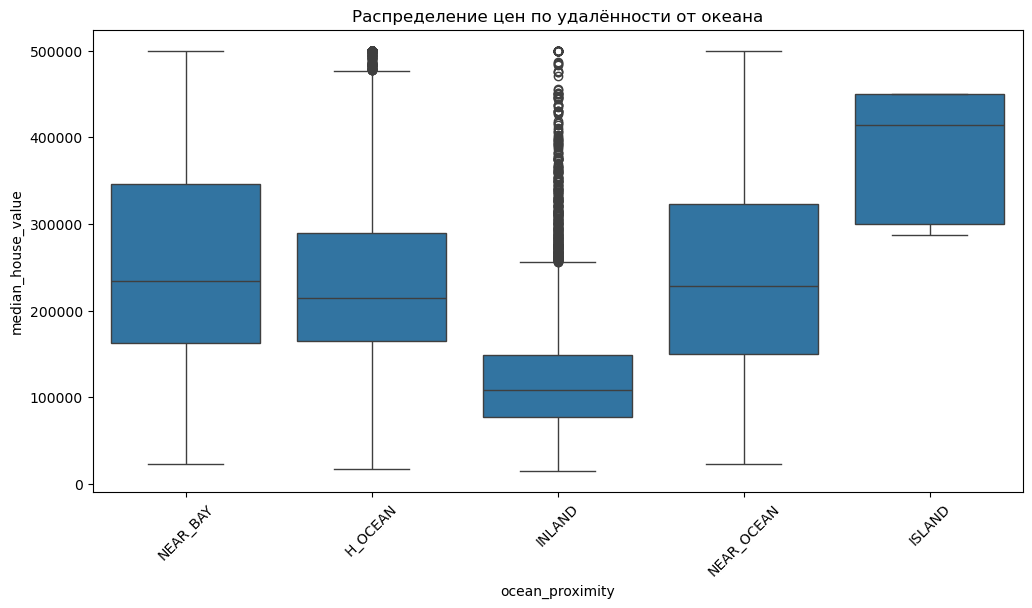

In [45]:
plt.figure(figsize = (12,6))
sns.boxplot(data = data, x = 'ocean_proximity', y = 'median_house_value')
plt.title('Распределение цен по удалённости от океана')
plt.xticks(rotation = 45)
plt.show()

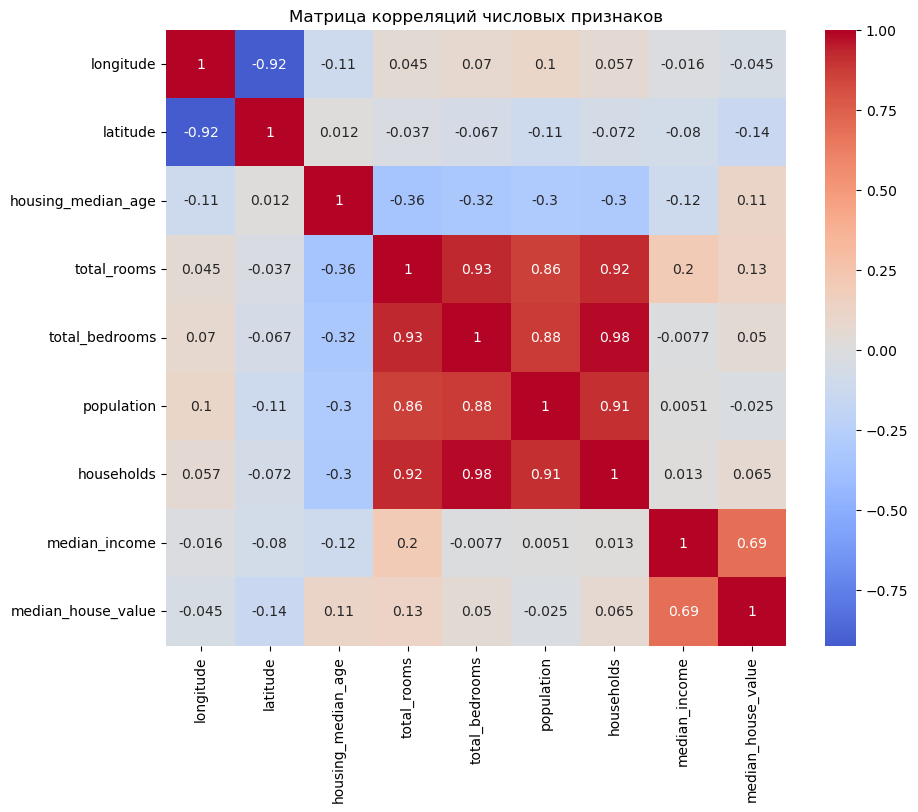

In [46]:
plt.figure(figsize = (10, 8))
numeric_data = data.select_dtypes(include = [np.number])
sns.heatmap(numeric_data.corr(), annot = True, cmap = 'coolwarm', center = 0)
plt.title('Матрица корреляций числовых признаков')
plt.show()

Видим, что наиболее коррелирующим с целевой переменной признаком является медианный доход

### Обработка выбросов

In [47]:
# Удаление выбросов
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        ck = (df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)
        df_clean = df_clean[ck]
    return df_clean

outlier_columns = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [48]:
X_train_clean = remove_outliers(X_train, outlier_columns)
y_train_clean = y_train.loc[X_train_clean.index]

X_test_clean = remove_outliers(X_test, outlier_columns)
y_test_clean = y_test.loc[X_test_clean.index]

print(f"Размер X_train после удаления выбросов: {X_train_clean.shape}")
print(f"Размер X_test после удаления выбросов: {X_test_clean.shape}")

Размер X_train после удаления выбросов: (13859, 9)
Размер X_test после удаления выбросов: (3495, 9)


In [49]:
# Напишу функцию для ограничения выбросов, чтобы применить её к колонке ocean_proximity
def limit_outliers(df, group_column, value_column, lower_quantile=0.05, upper_quantile=0.95):
    limit_data = []
    for group in df[group_column].unique():
        group_data = df[df[group_column] == group].copy()
        lower_bound = group_data[value_column].quantile(lower_quantile)
        upper_bound = group_data[value_column].quantile(upper_quantile)

        group_data[value_column] = np.clip(group_data[value_column], lower_bound, upper_bound)
        limit_data.append(group_data)

    return pd.concat(limit_data, ignore_index=True)

In [50]:
temp_train = X_train_clean.copy()
temp_train['median_house_value'] = y_train_clean

temp_train_limited = limit_outliers(temp_train, 'ocean_proximity', 'median_house_value', 0.05, 0.95)

X_train_final = temp_train_limited.drop('median_house_value', axis=1)
y_train_final = temp_train_limited['median_house_value']


temp_test = X_test_clean.copy() 
temp_test['median_house_value'] = y_test_clean
temp_test_limited = limit_outliers(temp_test, 'ocean_proximity', 'median_house_value', 0.05, 0.95)

X_test_final = temp_test_limited.drop('median_house_value', axis=1)
y_test_final = temp_test_limited['median_house_value']

In [51]:
# Создаю новые признаки
def create_features(df):
    df = df.copy()
    
    df['rooms_per_household'] = df['total_rooms'] / df['households']
    df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
    df['population_per_household'] = df['population'] / df['households']
    df['income_per_person'] = df['median_income'] / df['population']
    
    return df


X_train_featured = create_features(X_train_final)
X_test_featured = create_features(X_test_final)

In [52]:
# One-Hot Encoding для ocean_proximity
X_train_encoded = pd.get_dummies(X_train_featured, columns=['ocean_proximity'])
X_test_encoded = pd.get_dummies(X_test_featured, columns=['ocean_proximity'])

print(f"X_train: {X_train_encoded.shape}")
print(f"X_test: {X_test_encoded.shape}")
print(X_test_encoded.info())

X_train: (13859, 17)
X_test: (3495, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3495 entries, 0 to 3494
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   3495 non-null   float64
 1   latitude                    3495 non-null   float64
 2   housing_median_age          3495 non-null   float64
 3   total_rooms                 3495 non-null   float64
 4   total_bedrooms              3495 non-null   float64
 5   population                  3495 non-null   float64
 6   households                  3495 non-null   float64
 7   median_income               3495 non-null   float64
 8   rooms_per_household         3495 non-null   float64
 9   bedrooms_per_room           3495 non-null   float64
 10  population_per_household    3495 non-null   float64
 11  income_per_person           3495 non-null   float64
 12  ocean_proximity_H_OCEAN     3495 non-null   bool  

### Построение моделей
Использую здесь Random Forest и Gradient Boosting и сравню их метрики

In [62]:
RF = RandomForestRegressor(n_estimators=100, random_state = 42)
GB = GradientBoostingRegressor(n_estimators=100, random_state = 42)

models = {
    'Random Forest': RF,
    'Gradient Boosting': GB
}

# Напишу функцию для оценки моделей
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):

    # Кросс-валидация 
    cv_scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name}:")
    print(f"  Cross-Val RMSE: {cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}")
    print(f"   RMSE: {rmse:.2f}")
    print(f"   MAE: {mae:.2f}")
    print(f"   MAPE: {mape:.2f}")
    print(f"   R²: {r2:.4f}")

    return model, y_pred, {'cv_rmse': cv_rmse.mean(), 'rmse': rmse, 'mae': mae, 'mape': mape, 'test_r2': r2}

In [63]:
# Оценка базовых моделей
base_results = {}
for name, model in models.items():
    trained_model, predictions, metrics = evaluate_model(
        model, X_train_encoded, y_train_final, X_test_encoded, y_test_final, f'Base {name}'
    )
    base_results[name] = {
        'model': trained_model,
        'predictions': predictions,
        'metrics': metrics
    }



Base Random Forest:
  Cross-Val RMSE: 47529.91 ± 12302.91
   RMSE: 43811.00
   MAE: 29781.27
   MAPE: 16.77
   R²: 0.8119

Base Gradient Boosting:
  Cross-Val RMSE: 50774.81 ± 11934.89
   RMSE: 47070.16
   MAE: 33709.71
   MAPE: 19.35
   R²: 0.7828


In [64]:
# Подберём гиперпараметры с RandomizedSearchCV
RF_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

GB_params = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

# Подбор для Random Forest
RF_search = RandomizedSearchCV(
    RandomForestRegressor(random_state = 42),
    RF_params,
    n_iter = 50,
    cv = 3,
    scoring = 'neg_mean_squared_error',
    random_state = 42,
    n_jobs = -1
)

RF_search.fit(X_train_encoded, y_train_final)
print(f"Лучшие параметры RF: {RF_search.best_params_}")
print(f"Лучший score RF: {np.sqrt(-RF_search.best_score_):.4f}")


# Подбор для Gradient Boosting
GB_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    GB_params,
    n_iter=50,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

GB_search.fit(X_train_encoded, y_train_final)
print(f"Лучшие параметры GB: {GB_search.best_params_}")
print(f"Лучший score GB: {np.sqrt(-GB_search.best_score_):.4f}")

Лучшие параметры RF: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 20, 'bootstrap': True}
Лучший score RF: 73086.3041
Лучшие параметры GB: {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.1}
Лучший score GB: 69157.0098


In [65]:
RF_best = RF_search.best_estimator_  
GB_best = GB_search.best_estimator_  

best_models = {
    'Random Forest (tuned)': RF_best,
    'Gradient Boosting (tuned)': GB_best
}


final_results = {}
for name, model in best_models.items():
    
    y_pred = model.predict(X_test_encoded)
    
    rmse = np.sqrt(mean_squared_error(y_test_final, y_pred))
    mae = mean_absolute_error(y_test_final, y_pred)
    mape = np.mean(np.abs((y_test_final - y_pred) / y_test_final)) * 100
    r2 = r2_score(y_test_final, y_pred)
    
    cv_scores = cross_val_score(model, X_train_encoded, y_train_final, 
                               cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)
    
    final_results[name] = {
        'model': model,  
        'predictions': y_pred,
        'metrics': {
            'cv_rmse_mean': cv_rmse.mean(),
            'cv_rmse_std': cv_rmse.std(),
            'test_rmse': rmse,
            'test_mae': mae,
            'test_mape': mape,
            'test_r2': r2
        }
    }
    
    print(f"{name}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  MAPE: {mape:.2f}")
    print(f"  R²: {r2:.4f}")

Random Forest (tuned):
  RMSE: 44021.74
  MAE: 29921.72
  MAPE: 16.76
  R²: 0.8101
Gradient Boosting (tuned):
  RMSE: 43247.14
  MAE: 30393.04
  MAPE: 17.31
  R²: 0.8167


Обе модели показывают хорошее качество, но Gradient Boosting немного лучше по RMSE(~774 меньшую) и R²(на 0,66% лучшую), в то время как Random Forest дает более точные предсказания в абсолютном выражении (MAE, MAPE).

In [66]:
feature_importance = GB_best.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X_train_encoded.columns,
    'importance': feature_importance
}).sort_values('importance', ascending = False)

print("Важность признаков:")
print(feature_importance_df)

Важность признаков:
                       feature  importance
7                median_income    0.398927
13      ocean_proximity_INLAND    0.248495
10    population_per_household    0.125914
0                    longitude    0.082047
1                     latitude    0.065017
2           housing_median_age    0.035134
8          rooms_per_household    0.010701
9            bedrooms_per_room    0.009835
11           income_per_person    0.005298
15    ocean_proximity_NEAR_BAY    0.005181
16  ocean_proximity_NEAR_OCEAN    0.004361
4               total_bedrooms    0.002741
3                  total_rooms    0.001962
5                   population    0.001903
6                   households    0.001595
14      ocean_proximity_ISLAND    0.000685
12     ocean_proximity_H_OCEAN    0.000205


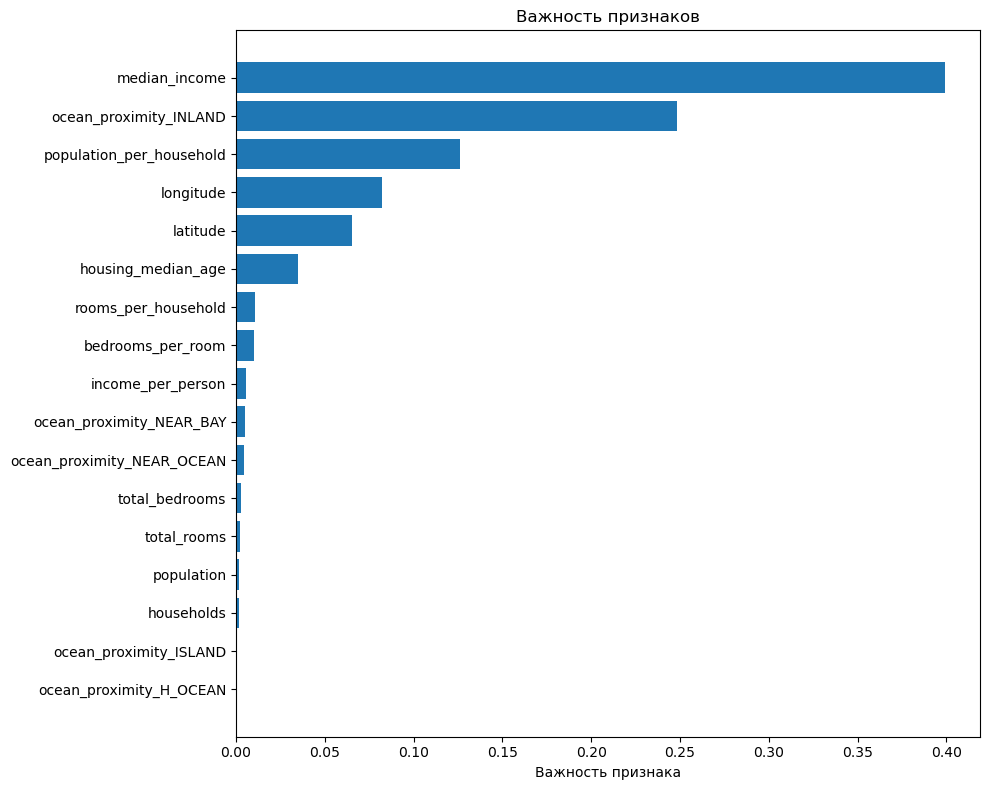

In [67]:
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Важность признака')
plt.title('Важность признаков')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

Можно сделать вывод, что доход домохозяйств - наиболее важный фактор формирования цены. Стоит заметить: расположение у океана и население также значительно влияют на цену.

### Сохраняем модель

In [59]:
model_filename = 'GB_model.pkl'
joblib.dump(GB_best, model_filename)

# Метаданные
metadata = {
    'model_name': 'Gradient Boosting Regressor - California Housing',
    'training_date': datetime.now().strftime('%Y-%m-%d'),
    'performance_metrics': {
        'test_rmse': rmse,
        'test_mae': mae,
        'test_mape': mape,
        'test_r2': r2
    },
    'feature_names': list(X_train_encoded.columns),
    'preprocessing': {
        'scaler_used': False,
        'log_transform_target': False,
        'features_engineered': True
    }
}


with open('model_metadata.json', 'w') as file:
    json.dump(metadata, file)